## *This notebook demonstrates basic usage of the code*

### Load QHED code

In [1]:
qhed_dir = "../"
# CG_dir = joinpath(qhed_dir, "CG") # specify directory for precomputed Clebsch-Gordan coefficients

include(joinpath(qhed_dir, "src", "QHED.jl"));

### Set matplotlib defaults

In [2]:
using PyPlot

PyPlot.matplotlib[:rc]("font", size=14)
PyPlot.matplotlib[:rc]("text", usetex=true)
PyPlot.matplotlib[:rc]("xtick", direction="in", bottom="on", top="on")
PyPlot.matplotlib[:rc]("xtick.minor", visible="on")
PyPlot.matplotlib[:rc]("ytick", direction="in", left="on", right="on")
PyPlot.matplotlib[:rc]("ytick.minor", visible="on")

# bblue = "#0C2340"
# borange = "#FC4C02"

### Set parameters and build setup
$N$ = number of electrons

$N_\phi$ = number of flux quanta penetrating sphere

For a LLL problem at filling factor $\nu$, we will in general have $N_\phi = \nu^{-1}N - S$, where $S$ is the "shift".

In [3]:
N = 12
Nphi = 2N - 3

setup = HaldaneSphereSetupLLL(N, Nphi, 0);

Building states list for N = 12, Nphi = 21, Lz = 0 ...
Finished building states list of size 16660
elapsed time: 0.313629542 seconds

Building L^2 matrix of size 16660 x 16660 ...
Working on LpLm, column j = 1: 1/16660 = 0.006002400960384154%
Working on LpLm, column j = 833: 833/16660 = 5.0%
Working on LpLm, column j = 1666: 1666/16660 = 10.0%
Working on LpLm, column j = 2499: 2499/16660 = 15.0%
Working on LpLm, column j = 3332: 3332/16660 = 20.0%
Working on LpLm, column j = 4165: 4165/16660 = 25.0%
Working on LpLm, column j = 4998: 4998/16660 = 30.0%
Working on LpLm, column j = 5831: 5831/16660 = 35.0%
Working on LpLm, column j = 6664: 6664/16660 = 40.0%
Working on LpLm, column j = 7497: 7497/16660 = 45.0%
Working on LpLm, column j = 8330: 8330/16660 = 50.0%
Working on LpLm, column j = 9163: 9163/16660 = 55.0%
Working on LpLm, column j = 9996: 9996/16660 = 60.0%
Working on LpLm, column j = 10829: 10829/16660 = 65.0%
Working on LpLm, column j = 11662: 11662/16660 = 70.0%
Working on LpL

### Calculate and plot Coulomb pseudopotentials for the lowest and first excited Landau levels

In [4]:
pp_LLL = spherical_Coulomb_pseudopotentials(get_ell(setup), 0)
pp_SLL = spherical_Coulomb_pseudopotentials(get_ell(setup), 1)

# pp = deepcopy(pp_LLL)
pp = deepcopy(pp_SLL)

SphericalPseudopotentials(10.5, 9.5, [21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0  …  9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0], [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0], [0.647293, 0.448627, 0.50082, 0.352973, 0.298615, 0.26634, 0.244242, 0.227975, 0.215456, 0.205535  …  0.185507, 0.180997, 0.177255, 0.174166, 0.171644, 0.169624, 0.168059, 0.166914, 0.166163, 0.165791])

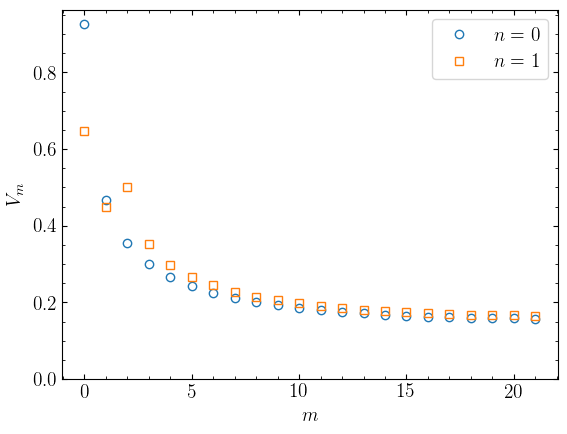

In [5]:
fig, ax = subplots()
ax[:plot](pp_LLL.m, pp_LLL.V, ls="none", marker="o", mfc="none", label="\$n=0\$")
ax[:plot](pp_SLL.m, pp_SLL.V, ls="none", marker="s", mfc="none", label="\$n=1\$")
ax[:set_xlabel]("\$m\$")
ax[:set_ylabel]("\$V_m\$")
ax[:legend](loc="best")
ax[:set_ylim](bottom=0);

### Build Hamiltonian

In [6]:
@time Hami = HaldaneSphereHamiLLL(setup, pp, build_CG_table(get_ell(setup)));
# @time Hami = HaldaneSphereHamiLLL(setup, pp, load_CG_table(get_ell(setup), CG_dir));

Building CG table for ell1 = 10.5, ell2 = 10.5:
Working on alpha1 = 1: 1/22
Working on alpha1 = 2: 2/22
Working on alpha1 = 3: 3/22
Working on alpha1 = 4: 4/22
Working on alpha1 = 5: 5/22
Working on alpha1 = 6: 6/22
Working on alpha1 = 7: 7/22
Working on alpha1 = 8: 8/22
Working on alpha1 = 9: 9/22
Working on alpha1 = 10: 10/22
Working on alpha1 = 11: 11/22
Working on alpha1 = 12: 12/22
Working on alpha1 = 13: 13/22
Working on alpha1 = 14: 14/22
Working on alpha1 = 15: 15/22
Working on alpha1 = 16: 16/22
Working on alpha1 = 17: 17/22
Working on alpha1 = 18: 18/22
Working on alpha1 = 19: 19/22
Working on alpha1 = 20: 20/22
Working on alpha1 = 21: 21/22
Working on alpha1 = 22: 22/22
elapsed time: 96.792481813 seconds

Building 2-body interaction matrix ...
Working on alpha1 = 1: 1/22
Working on alpha1 = 2: 2/22
Working on alpha1 = 3: 3/22
Working on alpha1 = 4: 4/22
Working on alpha1 = 5: 5/22
Working on alpha1 = 6: 6/22
Working on alpha1 = 7: 7/22
Working on alpha1 = 8: 8/22
Working on 

### Diagonalize Hamiltonian

In [7]:
# eig!(Hami);
eigs!(Hami, 50);

Diagonalizing Hami of size 16660 x 16660 with eigs, nev = 50 ...
elapsed time: 7.080410053 seconds



### Organize energy spectrum according to total angular momentum quantum number $L$

In [8]:
organize_spectrum!(Hami);

Organizing spectrum according to quantum number L ...
elapsed time: 0.035451185 seconds



### Plot energy spectrum

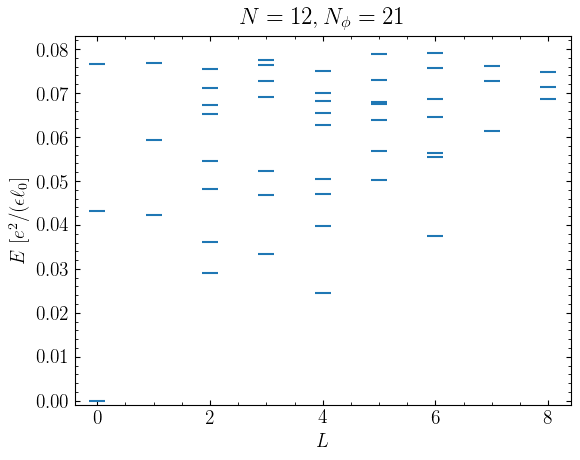

In [9]:
fig, ax = subplots()
ax[:plot](Hami.spectrum[:, 1], Hami.spectrum[:, 2] - minimum(Hami.spectrum[:, 2]), ls="none", marker="_", ms="12", mew="1.5")
ax[:set_xlabel]("\$L\$")
ax[:set_ylabel]("\$E~[e^2/(\\epsilon\\ell_0]\$")
ax[:set_title]("\$N=$(N), N_\\phi=$(Nphi)\$")
ax[:set_ylim](bottom=-0.001);

### Define ground state wave function

In [10]:
psi = Hami.eigenstates[:, 1];

### Calculate and plot entanglement spectrum

In [11]:
subsystemA = collect(Int(get_Norb(setup)/2+1):get_Norb(setup))
NA = Int(N/2)
LzAvec = collect(sum(setup.states.possible_mz[subsystemA][1:NA]):sum(setup.states.possible_mz[subsystemA][end-NA+1:end]))

ent_spec = entanglement_spectrum(psi, setup.states, subsystemA, NA, LzAvec);

Calculating entanglement spectrum for NA = 6, LzA = [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0] ...
elapsed time: 0.530126771 seconds



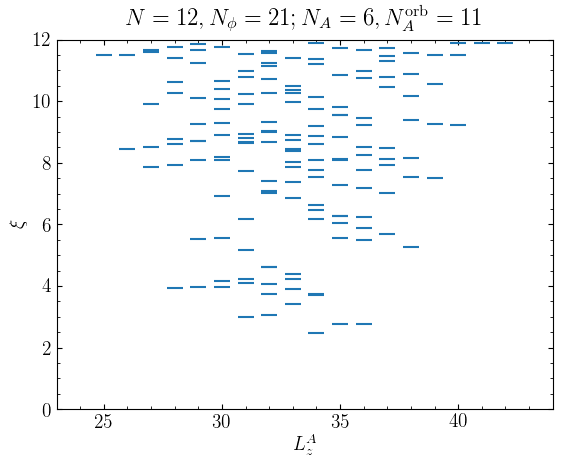

In [12]:
fig, ax = subplots()
ax[:plot](ent_spec[:, 1], ent_spec[:, 2], ls="none", marker="_", ms="12", mew="1.5")
ax[:set_xlabel]("\$L_z^A\$")
ax[:set_ylabel]("\$\\xi\$")
ax[:set_title]("\$N=$(N), N_\\phi=$(Nphi); N_A=$(NA), N_A^\\mathrm{orb}=$(length(subsystemA))\$")
ax[:set_xlim](23, 44)
ax[:set_ylim](0, 12);

### Calculate and plot pair correlation function along equator of sphere (great circle)
$g(\mathbf{r}) \equiv \frac{1}{\rho^2}\langle\hat\psi^\dagger(\mathbf{r})\,\hat\psi^\dagger(0)\,\hat\psi(0)\,\hat\psi(\mathbf{r})\rangle $, where $\hat\psi(\mathbf{r})$ is the electron field operator in the continuum projected into the LLL, and $\rho$ is the 2D density of electrons.

In [13]:
g = pair_correlation_function_equator_gc(psi, setup.states, pts=200, frac=0.5);

Computing 4-point functions ...
Working on alpha2p = 1: 1/22
Working on alpha2p = 2: 2/22
Working on alpha2p = 3: 3/22
Working on alpha2p = 4: 4/22
Working on alpha2p = 5: 5/22
Working on alpha2p = 6: 6/22
Working on alpha2p = 7: 7/22
Working on alpha2p = 8: 8/22
Working on alpha2p = 9: 9/22
Working on alpha2p = 10: 10/22
Working on alpha2p = 11: 11/22
Working on alpha2p = 12: 12/22
Working on alpha2p = 13: 13/22
Working on alpha2p = 14: 14/22
Working on alpha2p = 15: 15/22
Working on alpha2p = 16: 16/22
Working on alpha2p = 17: 17/22
Working on alpha2p = 18: 18/22
Working on alpha2p = 19: 19/22
Working on alpha2p = 20: 20/22
Working on alpha2p = 21: 21/22
Working on alpha2p = 22: 22/22
elapsed time: 4.589514643 seconds

Computing pair correlation function for 200 points ...
Working on g[i], i = 1: 1/200 = 0.5%
Working on g[i], i = 10: 10/200 = 5.0%
Working on g[i], i = 20: 20/200 = 10.0%
Working on g[i], i = 30: 30/200 = 15.0%
Working on g[i], i = 40: 40/200 = 20.0%
Working on g[i], i

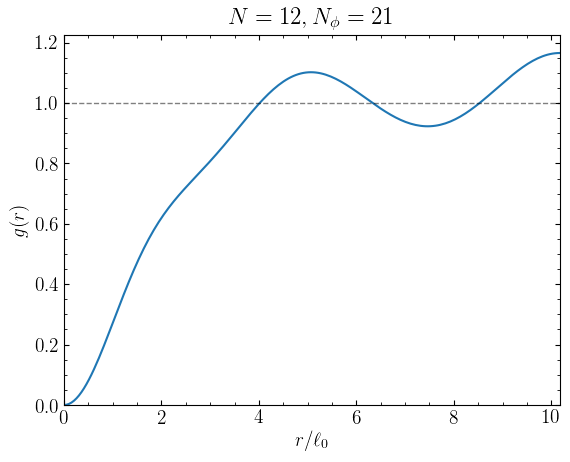

In [14]:
fig, ax = subplots()
ax[:plot](g[:, 1], g[:, 2])
ax[:set_xlabel]("\$r/\\ell_0\$")
ax[:set_ylabel]("\$g(r)\$")
ax[:set_title]("\$N=$(N), N_\\phi=$(Nphi)\$")
ax[:axhline](1, c="k", ls="--", lw=1, alpha=0.5)
ax[:set_xlim](0, maximum(g[:, 1]))
ax[:set_ylim](bottom=0);
# fig[:savefig]("g.pdf", transparent=true, bbox_inches="tight");